In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

In [2]:
path = "./data/B题附件1.xlsx"
data = pd.read_excel(path, sheet_name=0)

In [3]:
data.head()

,节点,传感器经度,传感器纬度
0,数据中心,120.701520,36.374227
1,传感器1,120.698717,36.374576
2,传感器2,120.699795,36.375912
3,传感器3,120.706910,36.375796
4,传感器4,120.705616,36.372483


In [4]:
node_num = data.shape[0]

In [6]:
x = data['传感器经度']
y = data['传感器纬度']
x0 = x[0]
y0 = y[0]
x1 = x[1:]
y1 = y[1:]
# xs = 120.701520
# xl = 120.72
xs = np.linspace(120.68, 120.72, 50)
k1 = -3
y2 = k1 * xs + 36.374227 - 120.701520 * k1
k2 = 3
y3 = k2 * xs + 36.374227 - 120.701520 * k2
k3 = 0
y4 = k3 * xs + 36.374227 - 120.701520 * k3

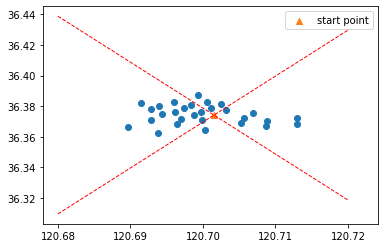

In [36]:
plt.scatter(x1, y1, marker='o')
plt.scatter(x0, y0, marker='^', label="start point")
plt.plot(xs, y2, color='red', linewidth=1.0, linestyle='--')
plt.plot(xs, y3, color='red', linewidth=1.0, linestyle='--')
# plt.plot(xs, y4, color='red', linewidth=1.0, linestyle='--')

plt.legend(loc='best')
plt.show()

In [9]:
path = "./data/B题附件1.xlsx"
df = pd.read_excel(path, sheet_name=0)
v = df.iloc[:, 1:3]
train_v = np.array(v)

In [10]:
center_loc = np.array(df.iloc[0:1, 1:3])
center_loc

array([[120.70152019,  36.37422699]])

In [11]:
np.array(df.iloc[:, 0])

array(['数据中心', '传感器1', '传感器2', '传感器3', '传感器4', '传感器5', '传感器6', '传感器7',
       '传感器8', '传感器9', '传感器10', '传感器11', '传感器12', '传感器13', '传感器14',
       '传感器15', '传感器16', '传感器17', '传感器18', '传感器19', '传感器20', '传感器21',
       '传感器22', '传感器23', '传感器24', '传感器25', '传感器26', '传感器27', '传感器28',
       '传感器29'], dtype=object)

In [12]:
path = "./data/B题附件2.xlsx"
df = pd.read_excel(path, sheet_name=0)

In [13]:
p = np.array(df.iloc[:, 3])
p[0] = 0
a = p.astype(np.float64)
a.dtype

dtype('float64')

In [14]:
v = np.array(df.iloc[:, 1:4])

In [15]:
center = v[0][:2].astype(np.float64)
center

array([120.70152019,  36.37422699])

In [16]:
node = v[1:]
node[:][0:2]

array([[120.69871747472, 36.3745756929757, 5.4],
       [120.699795441332, 36.3759123905177, 7.8]], dtype=object)

In [17]:
road = [0, 21, 23, 24, 28, 22, 3, 4, 5, 13, 10, 16, 27, 12, 8, 15, 9, 7, 11, 6, 14, 25, 18, 26, 19, 20, 1, 2, 17, 29]

In [18]:
def get_distance(x1, y1, x2, y2):
    # x,y分别表示一个经纬度坐标点
    if x1 == x2 and y1 == y2:
        return 0
    R = 6371
    theta = math.acos(math.sin(x1) * math.sin(x2) + (math.cos(x1) * math.cos(x2) * math.cos(y1 - y2)))
    L = theta * R
    return L

In [19]:
l = np.array([2, 3])
p = np.array([3, 4])
k = []
k.append(l)
k.append(p)

In [20]:
from sklearn.cluster import KMeans

In [22]:
test = train_v[1:]
print(test.shape)
test

(29, 2)


array([[120.69871747,  36.37457569],
       [120.69979544,  36.37591239],
       [120.70691002,  36.37579616],
       [120.70561646,  36.37248342],
       [120.70317307,  36.37753964],
       [120.69289646,  36.37800457],
       [120.69433374,  36.37521499],
       [120.69735205,  36.37876006],
       [120.69620222,  36.37643544],
       [120.70116087,  36.37905063],
       [120.69390256,  36.38021291],
       [120.69835815,  36.38056159],
       [120.70252629,  36.38120084],
       [120.69145917,  36.38201441],
       [120.69605849,  36.38247931],
       [120.70051409,  36.38276987],
       [120.69986731,  36.37079794],
       [120.69289646,  36.37079794],
       [120.69648968,  36.36824059],
       [120.69692086,  36.37143727],
       [120.70525714,  36.36899618],
       [120.70885036,  36.37021674],
       [120.70870663,  36.36731063],
       [120.7130185 ,  36.36829872],
       [120.68966256,  36.36661314],
       [120.69375883,  36.36242812],
       [120.69936425,  36.38741865],
 

In [23]:
def get_distance(x1, y1, x2, y2):
    # x,y分别表示一个经纬度坐标点
    if x1 == x2 and y1 == y2:
        return 0
    R = 6371
    theta = math.acos(math.sin(x1) * math.sin(x2) + (math.cos(x1) * math.cos(x2) * math.cos(y1 - y2)))
    L = theta * R
    return L

In [25]:
x_all = []
for i in test:
    x_all.append([i[0] - center[0], i[1] - center[1]])
#     x_all.append([i[0], i[1], get_distance(i[0], i[1], center[0], center[1])])

In [26]:
x_all = np.array(x_all)

In [27]:
x_all

array([[-0.00280271,  0.00034871],
       [-0.00172475,  0.00168541],
       [ 0.00538983,  0.00156917],
       [ 0.00409627, -0.00174356],
       [ 0.00165288,  0.00331266],
       [-0.00862373,  0.00377758],
       [-0.00718644,  0.000988  ],
       [-0.00416814,  0.00453307],
       [-0.00531797,  0.00220845],
       [-0.00035932,  0.00482365],
       [-0.00761763,  0.00598593],
       [-0.00316204,  0.00633461],
       [ 0.0010061 ,  0.00697385],
       [-0.01006102,  0.00778743],
       [-0.0054617 ,  0.00825232],
       [-0.0010061 ,  0.00854288],
       [-0.00165288, -0.00342904],
       [-0.00862373, -0.00342904],
       [-0.00503051, -0.00598639],
       [-0.00459932, -0.00278972],
       [ 0.00373695, -0.0052308 ],
       [ 0.00733017, -0.00401025],
       [ 0.00718644, -0.00691636],
       [ 0.01149831, -0.00592827],
       [-0.01185763, -0.00761384],
       [-0.00776136, -0.01179887],
       [-0.00215593,  0.01319167],
       [ 0.01142645, -0.00220852],
       [-0.00129356,

In [28]:
x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

In [29]:
kmeans = KMeans(n_clusters=4, random_state=0)

In [30]:
kmeans.fit(x_all)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [28]:
kmeans.labels_

array([3, 3, 1, 1, 0, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 0, 2, 2, 2, 2, 1, 1,
       1, 1, 2, 2, 0, 1, 2])

In [31]:
kmeans.labels_

array([3, 3, 1, 1, 0, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 0, 2, 2, 2, 2, 1, 1,
       1, 1, 2, 2, 0, 1, 2])

In [32]:
a1 = []
a2 = []
a3 = []
a4 = []
for i in range(len(kmeans.labels_)):
    if kmeans.labels_[i] == 0:
        a1.append(i)
    elif kmeans.labels_[i] == 1:
        a2.append(i)
    elif kmeans.labels_[i] == 2:
        a3.append(i)
    elif kmeans.labels_[i] == 3:
        a4.append(i)

In [33]:
aa1 = []
aa2 = []
aa3 = []
aa4 = []

In [34]:
for i in a1:
    aa1.append(test[i])
for i in a2:
    aa2.append(test[i])
for i in a3:
    aa3.append(test[i])
for i in a4:
    aa4.append(test[i])

In [35]:
print("{}, {}, {}, {}".format(a1, a2, a3,a4))

[4, 9, 11, 12, 15, 26], [2, 3, 20, 21, 22, 23, 27], [16, 17, 18, 19, 24, 25, 28], [0, 1, 5, 6, 7, 8, 10, 13, 14]


In [33]:
aa1x = []
aa1y = []
for i in aa1:
    aa1x.append(i[0])
    aa1y.append(i[1])
aa2x = []
aa2y = []
for i in aa2:
    aa2x.append(i[0])
    aa2y.append(i[1])
aa3x = []
aa3y = []
for i in aa3:
    aa3x.append(i[0])
    aa3y.append(i[1])
aa4x = []
aa4y = []
for i in aa4:
    aa4x.append(i[0])
    aa4y.append(i[1])

In [24]:
center = train_v[0]
center

array([120.70152019,  36.37422699])

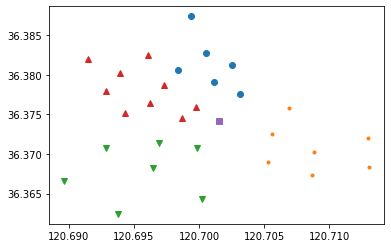

In [35]:
fig, ax = plt.subplots()
ax.plot(aa1x, aa1y, 'o')
ax.plot(aa2x, aa2y, '.')
ax.plot(aa3x, aa3y, 'v')
ax.plot(aa4x, aa4y, '^')
ax.plot(center[0], center[1], 's')
plt.show()

array([[120.69871747,  36.37457569],
       [120.69979544,  36.37591239],
       [120.70691002,  36.37579616],
       [120.70561646,  36.37248342],
       [120.70317307,  36.37753964],
       [120.69289646,  36.37800457],
       [120.69433374,  36.37521499],
       [120.69735205,  36.37876006],
       [120.69620222,  36.37643544],
       [120.70116087,  36.37905063],
       [120.69390256,  36.38021291],
       [120.69835815,  36.38056159],
       [120.70252629,  36.38120084],
       [120.69145917,  36.38201441],
       [120.69605849,  36.38247931],
       [120.70051409,  36.38276987],
       [120.69986731,  36.37079794],
       [120.69289646,  36.37079794],
       [120.69648968,  36.36824059],
       [120.69692086,  36.37143727],
       [120.70525714,  36.36899618],
       [120.70885036,  36.37021674],
       [120.70870663,  36.36731063],
       [120.7130185 ,  36.36829872],
       [120.68966256,  36.36661314],
       [120.69375883,  36.36242812],
       [120.69936425,  36.38741865],
 

In [106]:
def get_distance(x1, y1, x2, y2):
    # x,y分别表示一个经纬度坐标点
    if x1 == x2 and y1 == y2:
        return 0
    R = 6371
    theta = math.acos(math.sin(x1) * math.sin(x2) + (math.cos(x1) * math.cos(x2) * math.cos(y1 - y2)))
    L = theta * R
    return L

In [119]:
x_all = []
for i in test:
    x_all.append([i[0], i[1]])
#     x_all.append([i[0], i[1], get_distance(i[0], i[1], center[0], center[1])])

In [120]:
x_all = np.array(x_all)

In [77]:
x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

In [121]:
kmeans = KMeans(n_clusters=4, random_state=0)

In [122]:
kmeans.fit(x_all)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [123]:
kmeans.labels_

array([2, 3, 1, 1, 3, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 3, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 3, 1, 0], dtype=int32)

In [124]:
a1 = []
a2 = []
a3 = []
a4 = []
for i in range(len(kmeans.labels_)):
    if kmeans.labels_[i] == 0:
        a1.append(i)
    elif kmeans.labels_[i] == 1:
        a2.append(i)
    elif kmeans.labels_[i] == 2:
        a3.append(i)
    elif kmeans.labels_[i] == 3:
        a4.append(i)

In [125]:
aa1 = []
aa2 = []
aa3 = []
aa4 = []

In [126]:
for i in a1:
    aa1.append(test[i])
for i in a2:
    aa2.append(test[i])
for i in a3:
    aa3.append(test[i])
for i in a4:
    aa4.append(test[i])

In [131]:
print("{}, {}, {}, {}".format(a1, a2, a3,a4))

[16, 17, 18, 19, 24, 25, 28], [2, 3, 20, 21, 22, 23, 27], [0, 5, 6, 7, 8, 10, 13, 14], [1, 4, 9, 11, 12, 15, 26]


In [127]:
aa1x = []
aa1y = []
for i in aa1:
    aa1x.append(i[0])
    aa1y.append(i[1])
aa2x = []
aa2y = []
for i in aa2:
    aa2x.append(i[0])
    aa2y.append(i[1])
aa3x = []
aa3y = []
for i in aa3:
    aa3x.append(i[0])
    aa3y.append(i[1])
aa4x = []
aa4y = []
for i in aa4:
    aa4x.append(i[0])
    aa4y.append(i[1])

In [128]:
center = train_v[0]
center

array([120.70152019,  36.37422699])

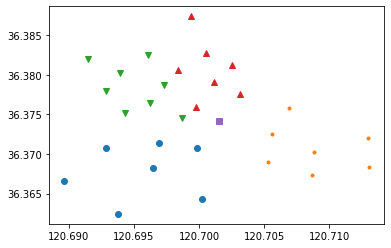

In [129]:
fig, ax = plt.subplots()
ax.plot(aa1x, aa1y, 'o')
ax.plot(aa2x, aa2y, '.')
ax.plot(aa3x, aa3y, 'v')
ax.plot(aa4x, aa4y, '^')
ax.plot(center[0], center[1], 's')
plt.show()